<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#О-проекте." data-toc-modified-id="О-проекте.-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>О проекте.</a></span></li><li><span><a href="#Цель." data-toc-modified-id="Цель.-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Цель.</a></span></li><li><span><a href="#План." data-toc-modified-id="План.-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>План.</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### О проекте. #####

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

### Цель. ###

- Спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.
- Построить модель с предельно большим значением F1-меры

### План. ###

- Исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.
- Улучшить качество модели, учитывать дисбаланс классов. Обучить разные модели и найти лучшую. Кратко описать выводы.
- Провести финальное тестирование.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
import numpy
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/datasets/Churn.csv")

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Сразу видим , что в столбце *`Tenure`* есть пропуски, а так же видим, что столбцы *`RowNumber`*, *`CustomerId`* и *`Surname`*, явно не понадобятся для обучения модели. Еще заметим категориальные столбцы *`Geography`* и *`Gender`*, которые преобразуем в численные техникой прямого кодирования.

Теперь переведем данные в график.

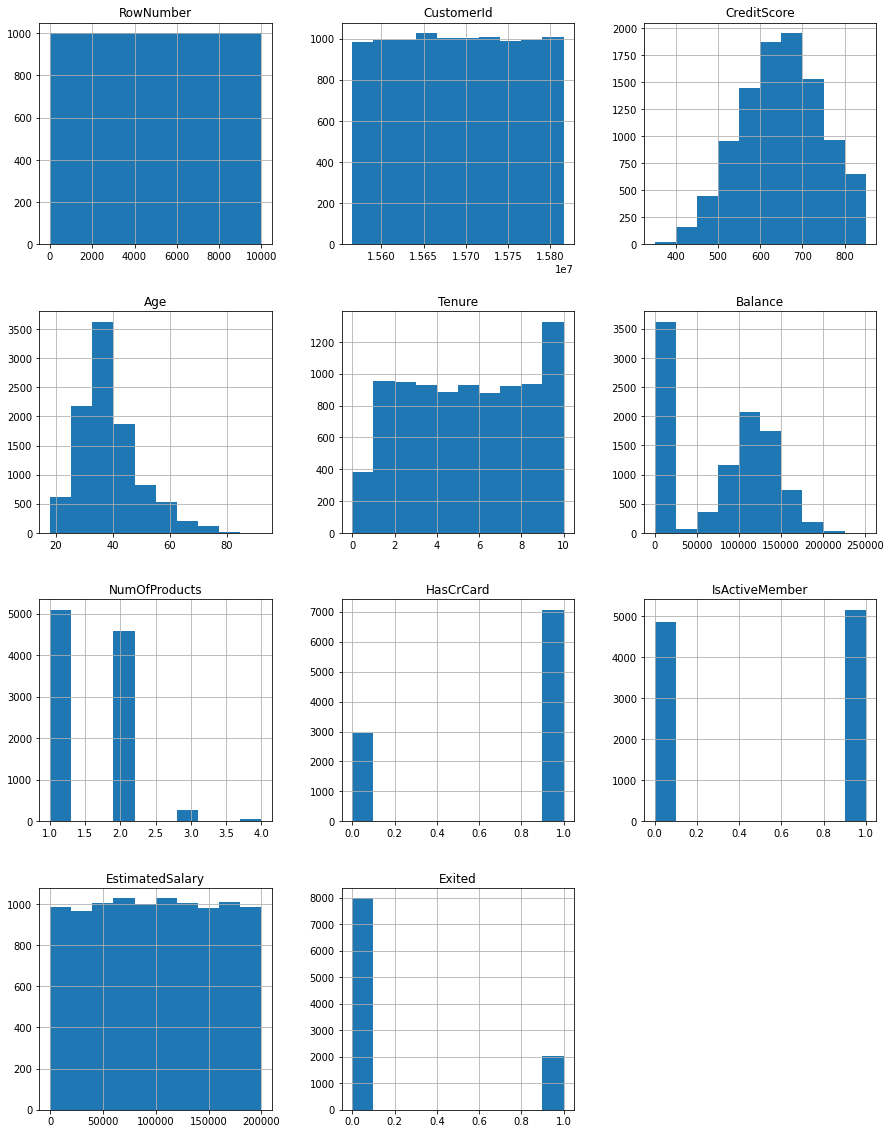

In [5]:
data.hist(figsize=(15,20));

В целом с данные адекватные, с ними все в порядке, вернемся к *`Tenure`* и посмотрим на данные с их пропуском.

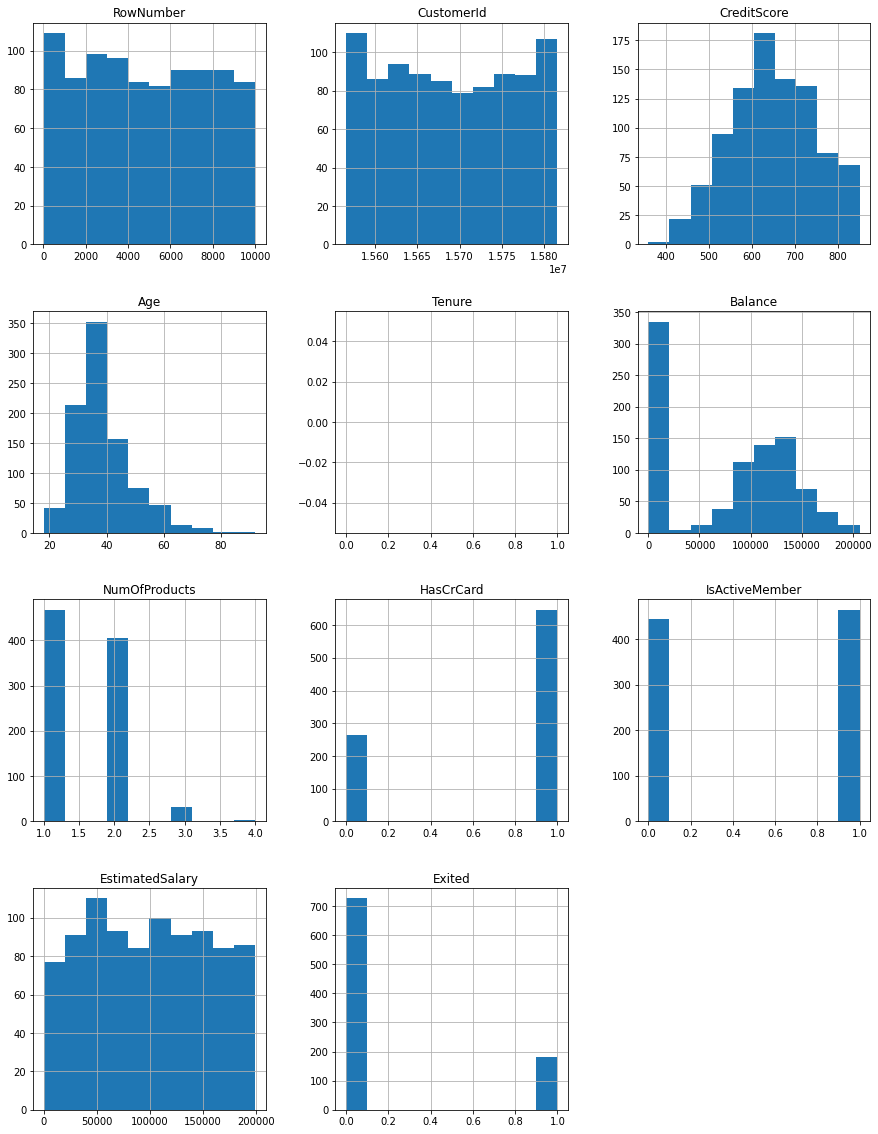

In [6]:
data[data["Tenure"].isna()].hist(figsize=(15,20));

Распределение осталось таким же, поэтому можем избавиться от этих пропусков. А также дропнем лишние столбики.

In [7]:
data['Tenure'] = data['Tenure'].replace(numpy.NaN, None).astype(int, errors='ignore').astype(object)

In [8]:
#data = data.dropna()
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Теперь преобразуем столбцы *`Geography`* и *`Gender`*

In [9]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  object 
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), object(1), uint8(3)
memory usage: 732.5+ KB


### Вывод ###


Данные подготовлены, теперь можем перейти к исследованию.

## Исследование задачи

Разобьем исходные данные разбиты в соотношении 3:1:1

In [10]:
data_train, data_valid = train_test_split(data, test_size=0.4, random_state=12345)
data_valid, data_test = train_test_split(data_valid, test_size=0.5, random_state=12345)


In [11]:
print("Размер датафрейма:",data.shape[0])
print("Размер тренериующей выборки:", data_train.shape[0])
print("Размер валидационной выборки:", data_valid.shape[0])
print("Размер тестовой выборки:", data_test.shape[0])

Размер датафрейма: 10000
Размер тренериующей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000


И разделим на признаки и на целевой признак каждую выборку.

In [12]:
features_train = data_train.drop("Exited", axis=1)
target_train = data_train["Exited"]

features_valid = data_valid.drop("Exited", axis=1)
target_valid = data_valid["Exited"]

features_test = data_test.drop("Exited", axis=1)
target_test = data_test["Exited"]

features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 7479 to 4578
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   int64  
 1   Age                6000 non-null   int64  
 2   Tenure             6000 non-null   object 
 3   Balance            6000 non-null   float64
 4   NumOfProducts      6000 non-null   int64  
 5   HasCrCard          6000 non-null   int64  
 6   IsActiveMember     6000 non-null   int64  
 7   EstimatedSalary    6000 non-null   float64
 8   Geography_Germany  6000 non-null   uint8  
 9   Geography_Spain    6000 non-null   uint8  
 10  Gender_Male        6000 non-null   uint8  
dtypes: float64(2), int64(5), object(1), uint8(3)
memory usage: 439.5+ KB


Теперь нормализуем каждую из выборок.

In [14]:
scaler = StandardScaler()
scaler.fit(features_train)
    
features_train = pd.DataFrame(scaler.transform(features_train))
target_train = target_train.reset_index(drop = True)

features_valid = pd.DataFrame(scaler.transform(features_valid))
target_valid = target_valid.reset_index(drop = True)

features_test = pd.DataFrame(scaler.transform(features_test))
target_test = target_test.reset_index(drop = True) 

### Вывод ###

-------

## Борьба с дисбалансом

Сперва воспользуемся техникой `upsampling`

Применим функцию с числом повторений 4 (чтобы примерно выровнять пропорции, т.к если посмотреть на ранее построенные графики, то можешь увидеть, что количество пользователей, которые продолжают пользоваться услугами банка в 3.9 раза выше количества пользователей, которые перестали пользоваться услугами банка.) и посмотрим, как изменятся метрики для такой модели:

In [18]:
data["Exited"].value_counts()
print(data[data["Exited"] == 0].count() / data[data["Exited"] == 1].count())


CreditScore          3.90918
Age                  3.90918
Tenure               3.90918
Balance              3.90918
NumOfProducts        3.90918
HasCrCard            3.90918
IsActiveMember       3.90918
EstimatedSalary      3.90918
Exited               3.90918
Geography_Germany    3.90918
Geography_Spain      3.90918
Gender_Male          3.90918
dtype: float64


In [19]:
data["Exited"].value_counts()[0]/data["Exited"].value_counts()[1]

3.9091801669121256

In [20]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [21]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Теперь перейдем к технике `downsampling`

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [23]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Итак перейдем к моделям, используя `upsampling`, и обучим их еще раз.

**Дерево решений. `upsampling`**

In [24]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print('Глубина дерева:', best_depth, 'f1 лучшей модели:', best_result)

Глубина дерева: 5 f1 лучшей модели: 0.5963791267305644


**Логистическая регрессия `upsampling`**

In [25]:
best_model = None
best_result = 0
best_max_iter = 0
for max_iter in range(1, 51):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter)
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_max_iter = max_iter
        
print("Лучшее количество итераций:", best_max_iter, "f1 лучшей модели:", best_result)

Лучшее количество итераций: 2 f1 лучшей модели: 0.49245432883240675


**Случайный лес `upsampling`**

In [26]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 101, 5):
    for depth in range(3, 21):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
print("Наилучшее количество деревьев:", best_est, "Наилучшая глубина", best_depth,  ", f1 лучшей модели:", best_result)

Наилучшее количество деревьев: 76 Наилучшая глубина 10 , f1 лучшей модели: 0.6260869565217393


Проверка моделей для `downsampling`

**Дерево решений. `downsampling`**

In [27]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print('Глубина дерева:', best_depth, 'f1 лучшей модели:', best_result)

Глубина дерева: 5 f1 лучшей модели: 0.5965621840242669


**Логистическая регрессия `downsampling`**

In [28]:
best_model = None
best_result = 0
best_max_iter = 0
for max_iter in range(1, 51):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter)
    model.fit(features_downsampled, target_downsampled) 
    predicted_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_max_iter = max_iter
        
print("Лучшее количество итераций:", best_max_iter, "f1 лучшей модели:", best_result)

Лучшее количество итераций: 4 f1 лучшей модели: 0.49056603773584906


**Случайный лес `downsampling`**

In [29]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 101, 5):
    for depth in range(3, 21):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled) 
        predicted_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
print("Наилучшее количество деревьев:", best_est, "Наилучшая глубина", best_depth,  ", f1 лучшей модели:", best_result)

Наилучшее количество деревьев: 66 Наилучшая глубина 7 , f1 лучшей модели: 0.6038095238095238


### Вывод ###

После устранения дисбаланаса, перед нами предстает такой результат:

- Модели при `upsampling`
    - Модель дерево решений показала f1 – 0.6
    - Модель случайного леса показала f1 – 0.63
    - Модель логистической регрессии показала f1 – 0.49


- Модели при `downsampling`
    - Модель дерево решений показала f1 – 0.59
    - Модель случайного леса показала f1 – 0.6
    - Модель логистической регрессии показала f1 – 0.49
    

Наилучшую метрику f1 показала модель случайного леса с гиперпараметром `n_estimators=76` и `max_depth=10` при технике `upsampling`.
Модель логистической регрессии показала наихудшую точность, но прибавила в качестве.

Как итог лучшая модель и ее гиперпараметры выглядят так:
- модель – случайный лес
- количество деревьев – 76
- глубина – 10
- показатель f1 – 0.63

## Тестирование модели

In [33]:
model = RandomForestClassifier(random_state=12345, n_estimators=76, max_depth=10)
model.fit(features_upsampled, target_upsampled) 
predicted_test = model.predict(features_test) 
print('f1 лучшей модели:', f1_score(target_test, predicted_test))

f1 лучшей модели: 0.6025641025641025


Качество метрики f1 чуть упало на тестовой выборке, но нам удалось достичь метрики f1, выше чем 0.59

Теперь же измерим AUC-ROC, сравним её значение с F1-мерой.

In [31]:
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print(auc_roc)

0.8420168168006105


Метрика лучше, чем у случайной модели. Теперь построим ROC-кривую

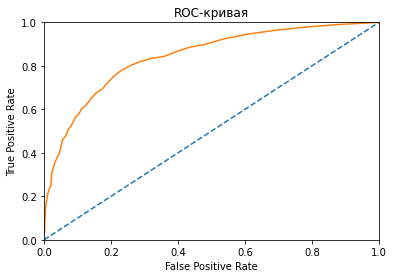

In [32]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')


plt.show()

### Вывод

Модель показала f1 метрику 0.63 и AUC-ROC = 0.84, это говорит о том в целом модель качественная и сбалансированная.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*

## Общий вывод

Весь план был выполнен, а именно:
- *Подготовка данных.*
    - Данные подготовлены, теперь можем перейти к исследованию..
- *Исследование задачи.*
    - Модель дерево решений показала f1 – 0.58
    - Модель случайного леса показала f1 – 0.6
    - Модель логистической регрессии показала f1 – 0.35

    - Наилучшую метрику f1 показала модель случайного леса с гиперпараметром `n_estimators=31` и `max_depth=13`.
        Так же модель дерево решений с гиперпараметром `max_depth=9`, показала почти такое же качество, что и модель случайного леса.
        Модель логистической регрессии показала наихудшую точность.
- *Борьба с дисбалансом*
    - Модели при `upsampling`
        - Модель дерево решений показала f1 – 0.6
        - Модель случайного леса показала f1 – 0.63
        - Модель логистической регрессии показала f1 – 0.49
    - Модели при `downsampling`
        - Модель дерево решений показала f1 – 0.59
        - Модель случайного леса показала f1 – 0.6
        - Модель логистической регрессии показала f1 – 0.49
    - Наилучшую метрику f1 показала модель случайного леса с гиперпараметром `n_estimators=78` и `max_depth=10` при технике `upsampling`. Модель логистической регрессии показала наихудшую точность, но прибавила в качестве.

    - Как итог лучшая модель и ее гиперпараметры выглядят так:
        - модель – случайный лес
        - количество деревьев – 76
        - глубина – 10
        - показатель f1 – 0.63
- *Тестирование модели*
    - Модель показала f1 метрику 0.63 и AUC-ROC = 0.84, это говорит о том в целом модель качественная и сбалансированная.

